# Tutorial 14: Periodic boundary conditions

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In this tutorial, we compute and relax a skyrmion in an interfacial-DMI material thin film using periodic boundary conditions.

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

We define mesh in cuboid through corner points `p1` and `p2`, and discretisation cell size `cell`. To define periodic boundary conditions, we pass an additional argument `pbc`. This argument can be any iterable (list, tuple, string, set) containing strings `'x'`, `'y'`, and/or `'z'`. Let us assume we want the periodic boundary conditions in $x$ and $y$ directions.

In [2]:
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9), cell=(5e-9, 5e-9, 5e-9), pbc='xy')

Now, we can define the system object:

In [3]:
system = oc.System(name='skyrmion')

system.hamiltonian = (oc.Exchange(A=1.6e-11)
                      + oc.DMI(D=4e-3, crystalclass='Cnv') 
                      + oc.UniaxialAnisotropy(K1=0.51e6, u=(0, 0, 1)) 
                      + oc.Zeeman(H=(0, 0, 0.2e5)))

Ms = 1.1e6

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, value=m_init, norm=Ms)

Finally we can minimise the energy and plot the magnetisation.

2020/01/07 15:31: Running OOMMF (skyrmion.mif) ... (1.0 s)


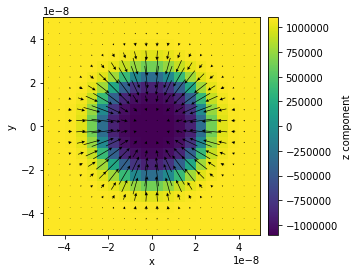

In [4]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

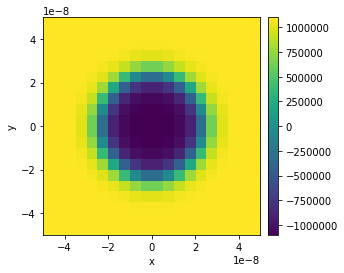

In [5]:
# Plot z-component only:
system.m.z.plane('z').mpl()

In [6]:
# 3d-plot of z-component
system.m.z.k3d_voxels(norm_field=system.m.norm)

Output()

In [7]:
system.delete()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).